### How should we choose N to ensure that we have approximately 90% chance of seeing the lower probability of infection after the vaccination that is significant at α = 0.05 level?

First of all, we can simulate vaccination using np.random.choice where 1 represents infected pigs and 0 represents non-infected pigs. Secondly we can perform permutation tests on control and treated arms from the previous step and calculate p-value to determine the statistical significance of the observed effect. Then by repeating permutation tests many times (in my case, 999), we can calsulate a chance of seeing the lower probability of infection after the vaccination that is significant at α = 0.05 level using p-value from the previous step and alpha. Finally, by repeating this process for several values of N, we can understand the relationship between N and the chance of detecting a lower infection rate. By plotting these values, we can identify the smallest N at which the chance exceeds 90%, thereby determining the N needed to ensure approximately a 90% chance of detecting the vaccine's effect.

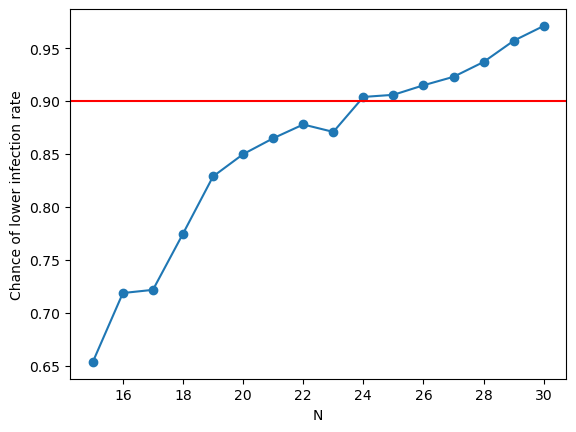

In [6]:
import numpy as np
np.random.seed(20241114)
import matplotlib.pyplot as plt

# Function to simulate vaccination(1: infected, 0: non-infected)
def simulate_outcomes(N, p_c, p_v):
    # Edge cases
    if N <= 0:
        raise ValueError("Sample size N must be greater than 0.")
    if not (0 <= p_c <= 1) or not (0 <= p_v <= 1):
        raise ValueError("Probabilities p_c and p_v must be between 0 and 1.")
    control = np.random.choice([0, 1], size=N, p=[1 - p_c, p_c])
    treated = np.random.choice([0, 1], size=N, p=[1 - p_v, p_v])
    return [control, treated]

# Function to perform permutation test
def permutation_test(treated, control, n_splits=9999):
    # Edge cases
    if len(treated) == 0 or len(control) == 0:
        raise ValueError("Both treated and control groups must have at least one sample.")
    if n_splits <= 0:
        raise ValueError("Number of splits (n_splits) must be greater than 0.")
    if not np.isfinite(treated).all() or not np.isfinite(control).all():
        raise ValueError("Treated and control groups must not contain NaN or infinite values.")
    all_together=np.concatenate((treated,control),axis=0) # Concatenate treatment and control arms
    differences=np.zeros(n_splits) # Prepare an array to store differences
    all_copy = all_together.copy() # Copy concatenated arms
    for i in range(n_splits):
        np.random.shuffle(all_copy) #Shuffle it
        fake_treated=all_copy[:len(treated)] # New treatment arms
        fake_control=all_copy[len(treated):] # New control arms
        differences[i]=fake_control.mean()-fake_treated.mean() # Store a difference
    return differences

Ns = range(15, 31)
p_c = 0.5
p_v = 0.1
alpha = 0.05
n_simulation = 999
chances = []
for N in Ns: 
    count = 0
    for i in range(n_simulation): # Repeat simulation to calculate a chance of lower infection rate
        vac = simulate_outcomes(N, p_c, p_v) # Simulate vaccination
        observed_dif = vac[0].mean() - vac[1].mean() # Calculate observed difference
        dif = permutation_test(vac[0], vac[1]) # Perform permutation test
        p_value = np.sum(dif >= observed_dif)/dif.size # Calculate p value
        if p_value < alpha: 
            count += 1 # Count up when statistically significant
    chances.append(count / n_simulation)

plt.plot(Ns, chances, marker='o')
plt.xlabel("N")
plt.ylabel("Chance of lower infection rate")
plt.axhline(y=0.9, color='red');

**Perform simulations at N=24 and confirm that there is indeed about 90% chance that the trial passes the statistical test**

In [8]:
N = 24
count = 0
for i in range(n_simulation): # Repeat simulation to calculate a chance of lower infection rate
    vac = simulate_outcomes(N, p_c, p_v) # Simulate vaccination
    observed_dif = vac[0].mean() - vac[1].mean() # Calculate observed difference
    dif = permutation_test(vac[0], vac[1]) # Perform permutation test
    p_value = np.sum(dif >= observed_dif)/dif.size # Calculate p value
    if p_value < alpha: 
        count += 1 # Count up when statistically significant
chance = count / n_simulation
print("Chance of lower infection rate is", chance)

Chance of lower infection rate is 0.8928928928928929


**It is confirmed that about 90% chance that the trial passes the statistical test.**